In [55]:
## Task 1 ## training and testing data sets
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Drop customerID and handle categorical data
df.drop("customerID", axis=1, inplace=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Features and target
X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
## Task 2 ## Decision tree and random forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Fit models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [57]:
print(dt_model)
print(rf_model)


DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)


In [58]:
## Task 3 ## K-Fold cross validation
from sklearn.model_selection import cross_val_score, KFold

# Use 5-fold CV
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
dt_cv_scores = cross_val_score(dt_model, X, y, cv=kfold)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kfold)

print("Decision Tree CV Accuracy:", dt_cv_scores.mean())
print("Random Forest CV Accuracy:", rf_cv_scores.mean())


Decision Tree CV Accuracy: 0.7242603281095032
Random Forest CV Accuracy: 0.7935150502314682


In [59]:
## Task 4 ##  Grid search CV
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Grid Search
grid = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8042666666666667


In [60]:
## Task 5 ## accuracy,precision ,recall and f1score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions for Decision Tree and Random Forest
dt_pred = dt_model.predict(X_test)
rf_pred = best_model.predict(X_test) # Using the best RF model from GridSearchCV

# Metrics for Decision Tree
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("F1 Score:", f1_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))


# Metrics for Random Forest (using the best model)
print("\nRandom Forest Metrics (Best Model):")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Decision Tree Metrics:
Accuracy: 0.7249466950959488
Precision: 0.4838709677419355
Recall: 0.5213903743315508
F1 Score: 0.5019305019305019
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.80      0.81      1033
        True       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407


Random Forest Metrics (Best Model):
Accuracy: 0.7903340440653873
Precision: 0.6405693950177936
Recall: 0.48128342245989303
F1 Score: 0.549618320610687
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



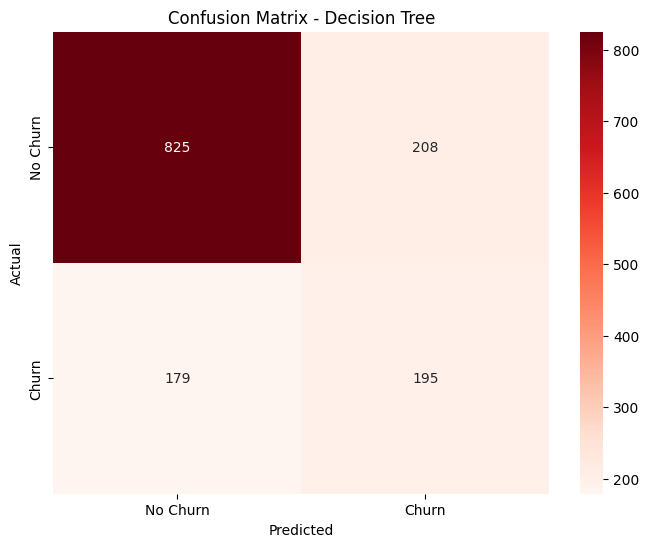

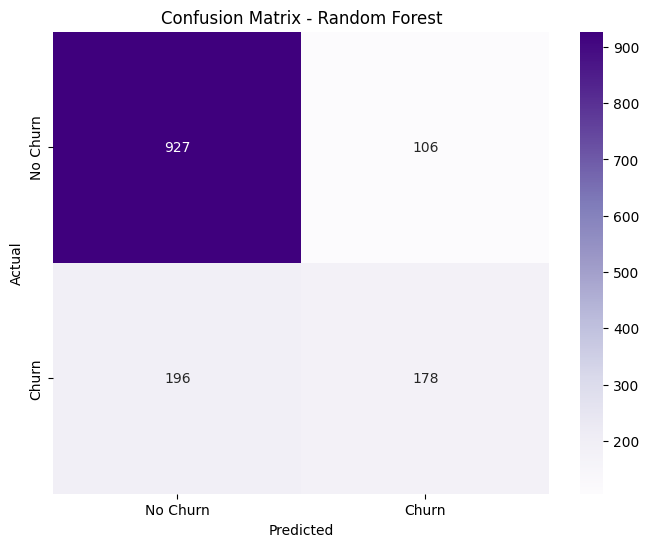

In [61]:
## confusion matrix ##
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for Decision Tree and Random Forest
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Confusion Matrix for Decision Tree
dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()